# PCA and Clustering documentation

### Kirill Gelgurt, Melanie Ullrich, Robin Hilbrecht, Tobias Jennert

## Einleitung
Das Ziel des Projekts ist es, die Wasserverteilung in Mozambik zu analysieren und mit den vorhandenen Umfragedaten eine funktionierende Methode für die Klassifizierung zu finden. Dazu stellen wir Statistiken der uns bereitgestellten Daten auf, um diese konkret analysieren zu können. Zum Schluss erfolgt eine intellektuelle Einteilung in neue Label, die wir mit einer PCA prüfen.

## Ausgangslage Mozambik
Um den Hintergrund des Projekts besser zu verstehen haben wir uns zuerst die Ausgangslage der Wasserverteilung in Mozambik angeschaut. Das Land hat ca. 32,4 Millionen Einwohner und eine Lebenserwartung von 61 Jahren. Rund die Hälfte der Bevölkerung hat Zugang zu sauberem Wasser. Jedoch müssen die Menschen weite Distanzen zurücklegen, um an eine sichere Wasserquelle zu gelangen. Ein weiteres Problem ist, dass Wasser oft nur eine Verfügbarkeit von wenigen Stunden hat oder nur in geringen Mengen vorhanden ist. In der Bevölkerung haben 37% keine Grundversorgung mit Wasser und 67% keine Grundversorgung mit Sanitäranlagen.

## Datengrundlage/Umfrage
Unsere Datengrundlage ist die zur Verfügung gestellte Umfrage zu der Verfügbarkeit und dem Zugang zu Trinkwasser. Das Datenset, welches uns zur Verfügung steht ist eine Aufstellung der Antworten aus dieser Umfrage. Die Haushalte wurden regionsspezifisch in verschiedene Cluster eingeteilt.

## Labelfindung
Im weiteren Schritt haben wir uns zur Labelfindung Gedanken gemacht, was unter den verschiedenen Arten von Wasser zu verstehen ist. Das Rohwasser ist das Oberflächen- und Grundwasser, wie es in der Natur vorkommt. Unter Trink- und Leitungswasser versteht man das Wasser, wie es aus unserem Hahn fließt. Hier gibt es unterschiedliche Grenzwerte, da das Wasser unterschiedliche Qualität aufweisen kann. 
Unsere Hauptfrage, auf welche sich zur Einteilung der Label konzentriert wurde, ist die Frage nach der Hauptquelle von Trinkwasser für die Haushalte. 


Für diese Antworten haben wir uns schließlich für die Einteilung in folgende 3 Klassen entschieden: 
-	**Elementarer Zugang:** sichere Quelle und weniger als 30 min. zeitlicher Aufwand
-	**Verbesserter Zugang:** sichere Quelle auf eigenem Grundstück ohne Verschmutzungen mit gesundheitlichem Risiko, sowie stetige Verfügbarkeit
-	**Kein Zugang zu Trinkwasser:** elementarer Zugang fehlt

Diese drei Klassen haben wir im nächsten Schritt mithilfe der Umfragedaten intellektuell erschlossen und eine Zuordnung der ankreuzbaren Label im Survey erarbeitet.



## Tabelle der neuen Zuordnung der Merkmale in die Label

Neues Label | Umfrage-Item
------ | ------
limited access        | unprotected well
                      | surface water
                      | unprotected spring
                      | rainwater
                      | tanker truck
                      | cart with small tank
elementary access     | protected well     
                      | tube well or borehole
                      | public tap/standpipe
                      | protected spring
improved access       | piped to neighbor
                      | piped to yard/plot
                      | piped into dwelling
                      | bottled water


# PCA und Statistik
Die neue Labeleinteilung haben wir im Vergleich mit den alten Klassen im nachfolgenden Teil mit einer PCA geprüft.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unnamed: 0                                                 337441231
ID                 AOHR71FLAOHR71FLAOHR71FLAOHR71FLAOHR71FLAOHR71...
cluster                                                 8010348100.0
residence          RuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralU...
year                                                      52363242.0
piped                                                       221644.0
groundwater                                                 321336.0
surface water                                                65278.0
rain                                                          6648.0
external source                                               8245.0
bottled water                                                26309.0
dtype: object
i 0
i 1
i 2
i 3
i 4
i 5


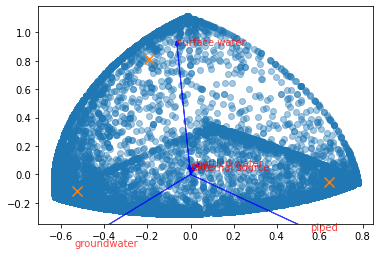

Varianz of pc1: 0.6889281227236062
Varianz of pc2: 0.1848837208570921
Varianz of pc3: 0.07595886124977244


In [ ]:
# import neccessary modules
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# path to the dataset
path = "/content/drive/MyDrive/Uni/Semester6/DIS22/data/joined-surveys-2013-grouped.csv"

# read in dataset
df = pd.read_csv(path)

#extract feature columns, wich are relevant for the analysis
feature_columns = ["piped", "groundwater", "surface water", "rain", "external source", "bottled water"]
features = df[feature_columns]

# print the sum of the values included in the feature_columns to get an first insight about the distribution 
print(df.sum())

# preprocess data and create centroids and labels for clusters
df = features.dropna()
T = preprocessing.Normalizer().fit_transform(features)
n_cluster = 3
k_mean_model = KMeans(n_clusters=n_cluster)
k_mean_model.fit(T)
centroids, labels = k_mean_model.cluster_centers_, k_mean_model.labels_

# apply the pca analysis
pca_model = PCA(n_components=3)
pca_model.fit(T)
I = pca_model.transform(T)
centroid_pca = pca_model.transform(centroids)

# plot the PCA components
plt.scatter(I[:, 0], I[:, 1],
            marker='o',
            alpha=0.4
            )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', 
            s=100,
            linewidths=3
            )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(I[:, 0])
yvector = pca_model.components_[1] * max(I[:, 1])
columns = features.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    print("i", i)
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='b', width=0.0005,
              head_width=0.02, alpha=0.75
              )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='r', alpha=0.75)

# plot the figure
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# print the varianz distribution of the principle components
varianz_of_pcs = pca_model.explained_variance_ratio_
for pc_i, pc_v in enumerate(varianz_of_pcs):
    print("Varianz of pc{}: {}".format(pc_i+1, pc_v))

In der Aufstellung der Label erkennen wir eine große Ungleichverteilung innerhalb der Klassen. Somit ist es hier schwierig eine PCA und ein Clustering zu erstellen, da so ungleiche Cluster erstellt werden.
Hier sind zum Beispiel bei "piped" und "groundwater" eine sehr hohe Anzahl zu verzeichnen und in den Labeln "rain" und "external source" weniger.

ClusterId                                               136594.0
Bottled water                                               17.0
Cart with small tank                                         9.0
Other                                                       17.0
Piped into dwelling                                        219.0
Piped to neighbor                                          493.0
Piped to yard/plot                                        1348.0
Protected spring                                            36.0
Protected well                                             435.0
Public tap/standpipe                                       936.0
Rainwater                                                  162.0
River/dam/lake/ponds/stream/canal/irrigation channel       537.0
Tanker truck                                                19.0
Tube well or borehole                                      624.0
Unprotected spring                                         135.0
Unprotected well         

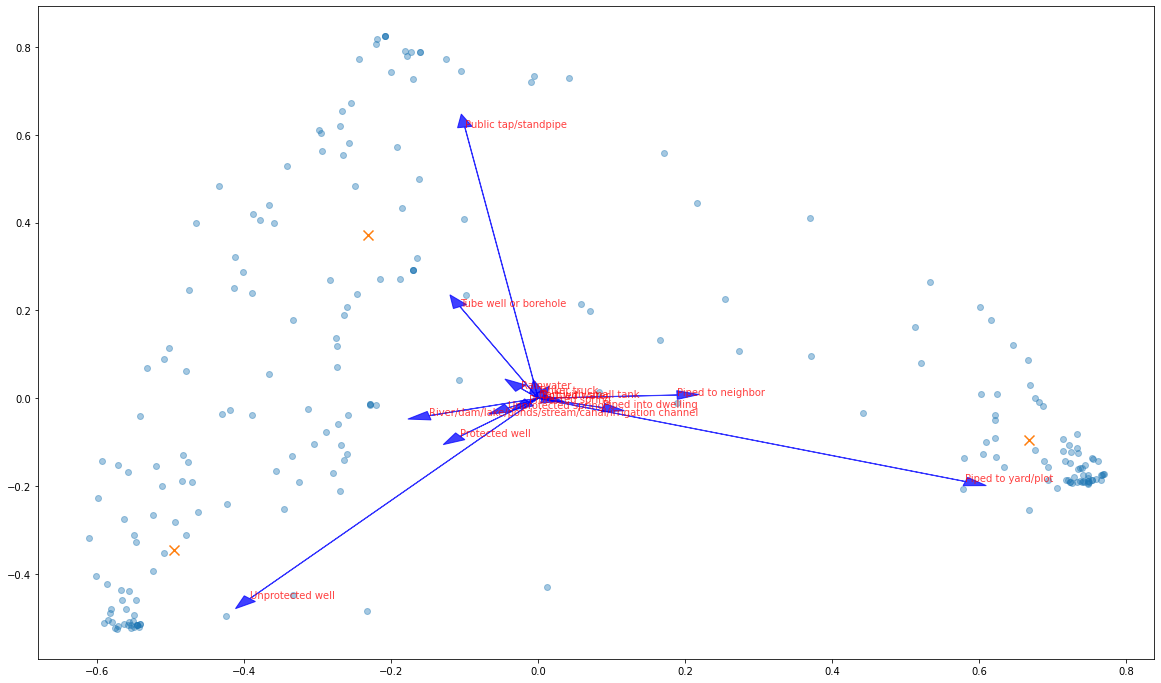

Varianz of pc1: 0.3720312524840214
Varianz of pc2: 0.19093088756261184
Varianz of pc3: 0.12863863260115269


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#path to the dataset
path = "/content/drive/MyDrive/Uni/Semester6/DIS22/data/survey_new_label.xlsx"

#read in dataset
df = pd.read_excel(path, sheet_name="label_distribution")

# fill na values with 0
df = df.fillna(0)

#columns to ignore as feature
ignore = ["ClusterId", "Other"]
#extract feature columns, wich are relevant for the analysis
features = [x for x in list(df.columns) if x not in ignore]
features = df[features]


# print the sum of the values included in the feature_columns to get an first insight about the distribution 
print(df.sum())

# preprocess data and create centroids and labels for clusters
df = features.dropna()
T = preprocessing.Normalizer().fit_transform(features)
n_cluster = 3
k_mean_model = KMeans(n_clusters=n_cluster)
k_mean_model.fit(T)
centroids, labels = k_mean_model.cluster_centers_, k_mean_model.labels_

# apply the pca analysis
pca_model = PCA(n_components=3)
pca_model.fit(T)
I = pca_model.transform(T)
centroid_pca = pca_model.transform(centroids)

# plot the PCA components
plt.scatter(I[:, 0], I[:, 1],
            marker='o',
            alpha=0.4
            )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', 
            s=100,
            linewidths=3
            )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(I[:, 0])
yvector = pca_model.components_[1] * max(I[:, 1])
columns = features.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    print("i", i)
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='b', width=0.0005,
              head_width=0.02, alpha=0.75
              )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='r', alpha=0.75)

# plot the figure
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# print the varianz distribution of the principle components
varianz_of_pcs = pca_model.explained_variance_ratio_
for pc_i, pc_v in enumerate(varianz_of_pcs):
    print("Varianz of pc{}: {}".format(pc_i+1, pc_v))

Im Beispiel oben wurde eine PCA für alle möglichen Antworten in der Umfrage zu diesem Thema erstellt. Wir erkennen hier geringe Prozentzahlen der Varianzen. Ungewöhnlich ist hier, dass die Label "protected well" und "unprotected well" in die gleiche Richtung des Clusters zeigen.

ClusterId            136594.0
elementary_access      2031.0
improved_access        2077.0
limited_access         2069.0
other                    17.0
dtype: float64
i 0
i 1
i 2


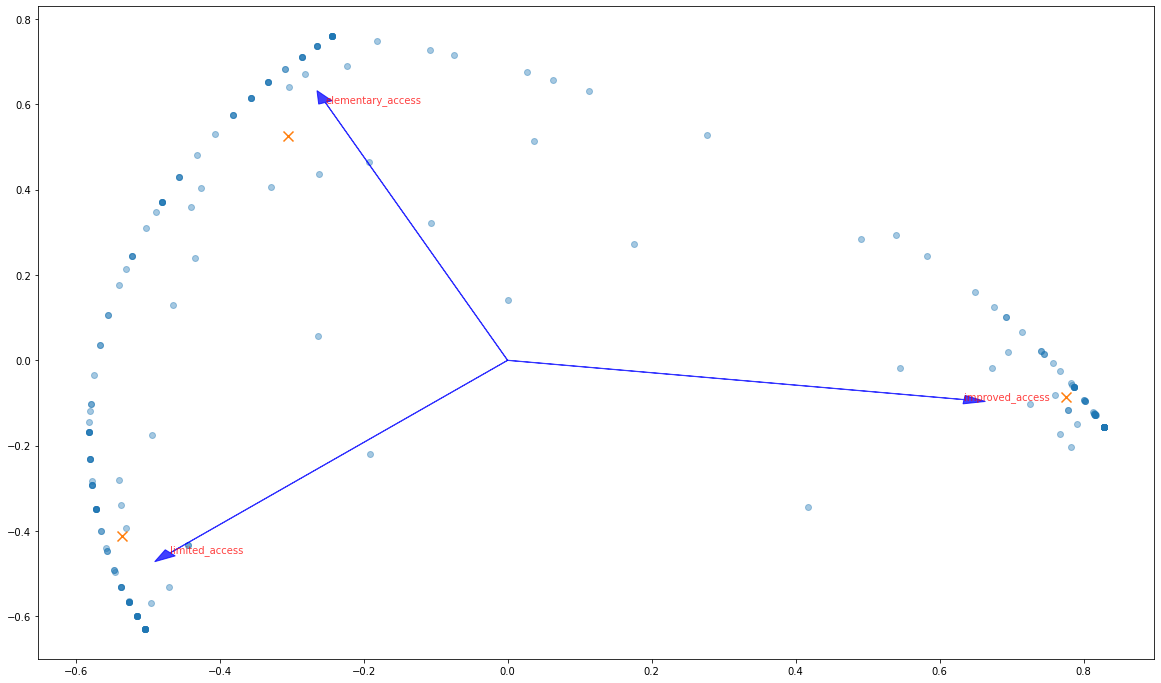

Varianz of pc1: 0.6556689975731034
Varianz of pc2: 0.3299890020991827
Varianz of pc3: 0.014342000327713924


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#path to the dataset
path = "/content/drive/MyDrive/Uni/Semester6/DIS22/data/survey_new_label.xlsx"

#read in dataset
df = pd.read_excel(path, sheet_name="New_data")

# fill na values with 0
df = df.fillna(0)

#extract feature columns, wich are relevant for the analysis
feature_columns = ["elementary_access", "improved_access", "limited_access"]
features = df[feature_columns]

# print the sum of the values included in the feature_columns to get an first insight about the distribution 
print(df.sum())

# preprocess data and create centroids and labels for clusters
df = features.dropna()
T = preprocessing.Normalizer().fit_transform(features)
n_cluster = 3
k_mean_model = KMeans(n_clusters=n_cluster)
k_mean_model.fit(T)
centroids, labels = k_mean_model.cluster_centers_, k_mean_model.labels_

# apply the pca analysis
pca_model = PCA(n_components=3)
pca_model.fit(T)
I = pca_model.transform(T)
centroid_pca = pca_model.transform(centroids)

# plot the PCA components
plt.scatter(I[:, 0], I[:, 1],
            marker='o',
            alpha=0.4
            )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', 
            s=100,
            linewidths=3
            )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(I[:, 0])
yvector = pca_model.components_[1] * max(I[:, 1])
columns = features.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    print("i", i)
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='b', width=0.0005,
              head_width=0.02, alpha=0.75
              )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='r', alpha=0.75)

# plot the figure
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# print the varianz distribution of the principle components
varianz_of_pcs = pca_model.explained_variance_ratio_
for pc_i, pc_v in enumerate(varianz_of_pcs):
    print("Varianz of pc{}: {}".format(pc_i+1, pc_v))

Wenn wir eine PCA mit den neu zugeteilten Label erstellen, sehen wir eine sehr gute Gleichverteilung in den Klassen. 
- elementary_access      2031.0
- improved_access        2077.0
- limited_access         2069.0

Dies ist sehr gut für eine Clusteranalyse. 


# Statistik der Daten

Die Aufschlüsselung der Items, kann in der Questionnaire_Items.xlsx nachgelesen werden. Dabei waren die rot markierten Items in den Rohdaten nicht auffindbar und sind somit kein Teil der Auswertung.

- nochmal die Questions hier reinschreiben?



Sowohl die Klasse "elementary access" als auch "limited access" bestehen aus öffentlichen Wasserquellen, wobei "elementary access" aus Trinkwasserversorgung besteht, welche infrastrukturell aufgebaut wurden, wie gebohrte Trinkwasserlöcher. "Limited access" beschränkt sich auf situationelle Wasserquellen, wie Wasserlöcher von Regenwasser, Wassertrucks und ähnlichem.

"Improved access" besteht großteilig aus fest ausgebauten Wasserrohren und ist aufgeteilt in Trinkasserverbindung zum Haus, zum Grundstück oder zum Nachbarn, alternativ auch Flaschenwasser.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#path to the dataset
path = "/content/drive/MyDrive/Uni/Semester6/DIS22/data/survey_new_label.xlsx"

#read in dataset
df = pd.read_excel(path, sheet_name="Raw_data")

In [ ]:
df.keys()

Index(['Index', 'HHID', 'Cluster_ID', 'HV201', 'New_Label', 'HV202', 'HV235',
       'HV204'],
      dtype='object')

In [ ]:
df = df.replace("River/dam/lake/ponds/stream/canal/irrigation channel", "surface_water")

Disclaimer:

Die Label der X-Achse der Histogramme lassen sich nicht sortieren. Stattdessen wurde als Ergänzung der jeweiligen Diagramme ein Bar-Chart erstellt.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29525564d0>,
      dtype=object)

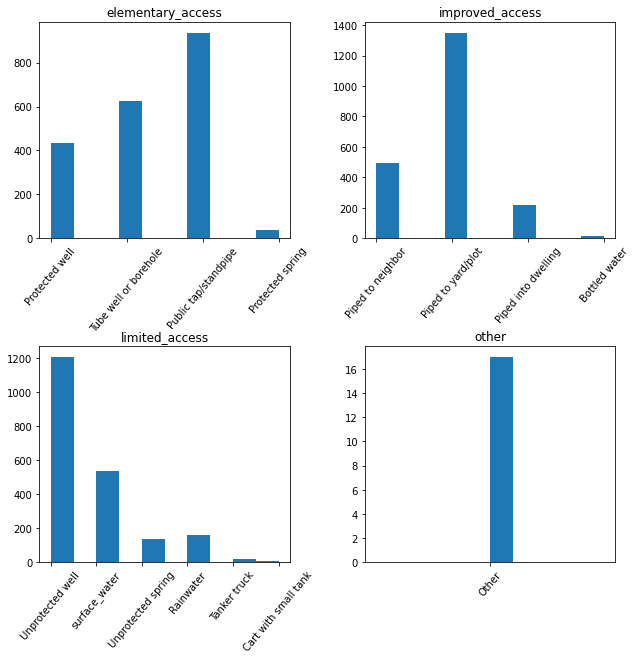

In [ ]:
# Verteilung der "alten Labels" auf die neuen Labels
df["HV201"].hist(xlabelsize = 10, xrot = 50, figsize = (10,10), by = df["New_Label"])

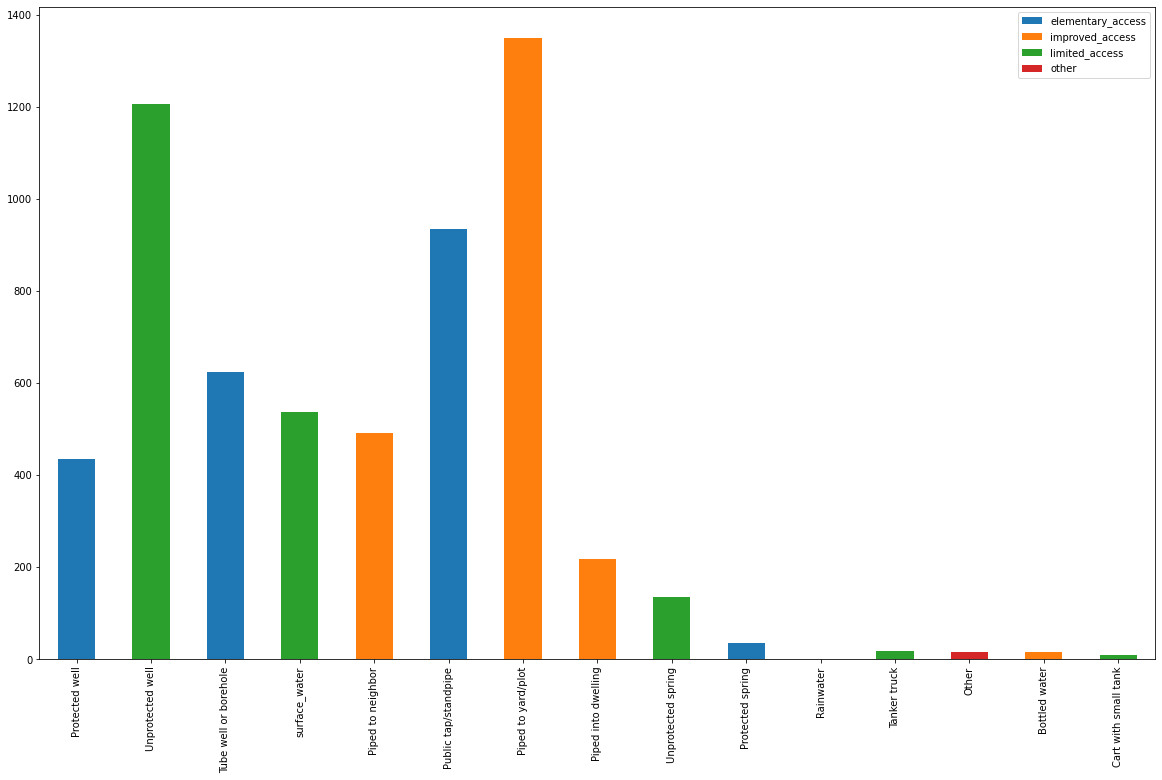

In [ ]:
#rslt = df[df["New_Label"] == "elementary_access"]
#rslt["HV201"].value_counts()
index=list(df["HV201"].unique())
elementary_access = [435,0,624,0,0,936,0,0,0,36,0,0,0,0,0]
improved_access = [0,0,0,0,493,0,1350,219,0,0,0,0,0,17,0]
limited_access = [0,1207,0,537,0,0,0,0,135,0,0,19,0,0,9]
other = [0,0,0,0,0,0,0,0,0,0,0,0,17,0,0]

dfp =pd.DataFrame({"elementary_access": elementary_access,
                  "improved_access": improved_access,
                  "limited_access":limited_access,
                  "other": other}, index=index)
ax = dfp.plot.bar(stacked = True)

Man kann anhand der Grafik deutlich erkennen, dass "elementary access" zum Großteil aus "public tap/standpipe" besteht, welches eines der sichersten öffentlichen Trinkwasserquellen darstellt.
Die nächstgrößeren Kategorien sind jeweils "tube well or borehole" und "protected well", welche sehr ähnlich von der Art sind. die kleinste Gruppe ist "protected spring", welche noch nicht mal 50 beinhaltet.

"Limited access" besteht zum größten Teil aus "unprotected well", wobei jedes der Items bis auf "tanker truck" und "cart with small tank" unsichere Trinkwasserquellen sind, welche bestenfalls aufbereitet genutzt werden können. Außerdem sind die beiden genannten "tank"-Items kaum vertreten.

"Improved access" besteht aus den sichersten Quellen mit bester Anbindung, und ist aufgeteilt in "piped to yard/plot", welches die größte Gruppe darstellt, "piped to neighbor", die zweitgrößte Gruppe und "piped into dwelling", welche mit knapp 200 recht klein ist.

Der Unterschied zwischen "own yard/plot" und "elsewhere" wird in der nächsten Grafik sehr deutlich. "elementary access" und "limited access" bestehen zu einem Großteil aus "elsewhere", während "improved access" nur aus "in own yard/plot" besteht.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f295269b650>,
      dtype=object)

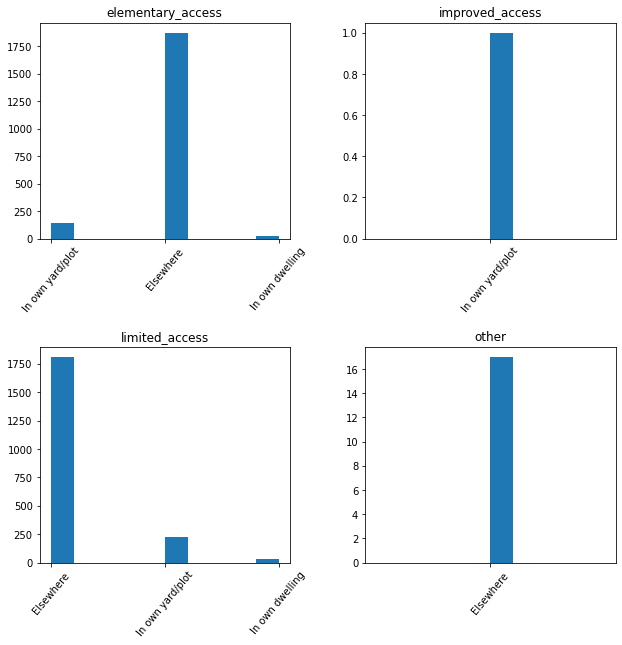

In [ ]:
# Verteilung der column HV235 auf die neuen Label
df["HV235"].hist(xlabelsize = 10, xrot = 50, figsize = (10,10), by = df["New_Label"])

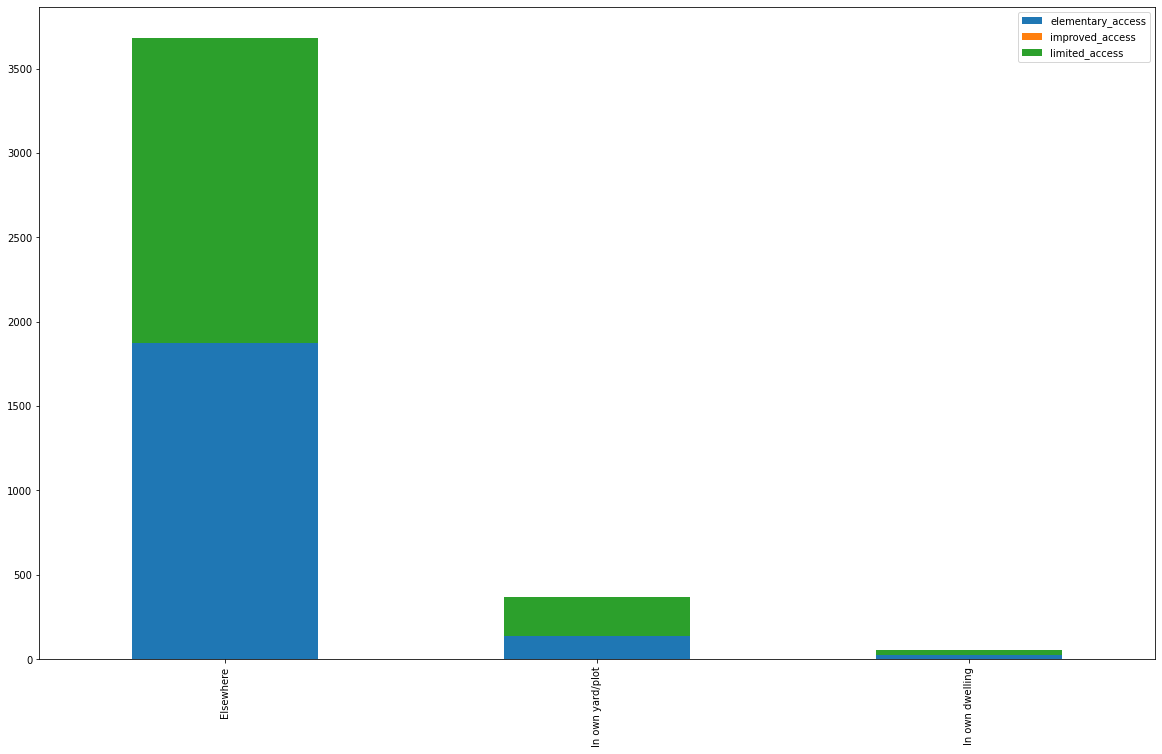

In [ ]:
index=["Elsewhere", "In own yard/plot", "In own dwelling"]
elementary_access = [1871,137,23]
improved_access = [0,1,0]
limited_access = [1811,228,30]

dfp =pd.DataFrame({"elementary_access": elementary_access,
                  "improved_access": improved_access,
                  "limited_access":limited_access}, index=index)
ax = dfp.plot.bar(stacked = True)

Bemerksenswert ist, dass "limited access" einen leicht höheren Anteil an "in own yard/plot" hat als "elementary access". Das liegt an der Art der Wasserquelle. "Elementary access" beinhaltet nämlich vor allem Wasserquellen, welche öffentlich sind und zu Infrastrukur gehören.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29520d7710>,
      dtype=object)

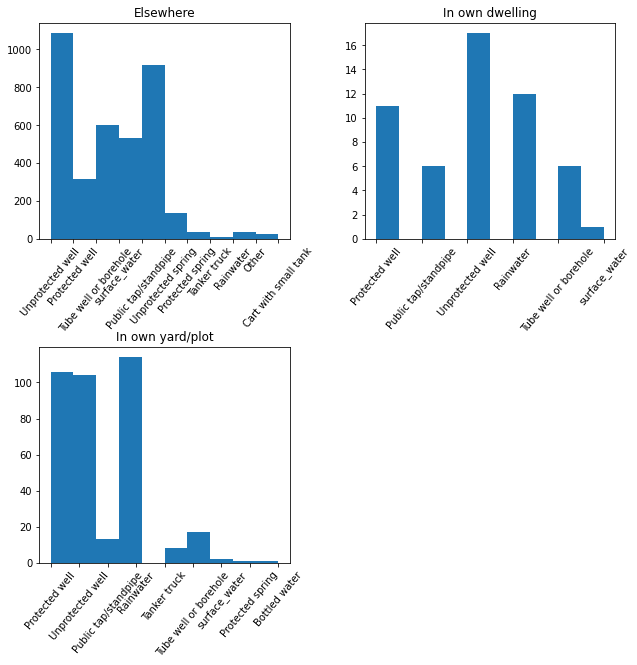

In [ ]:
# Verteilung der column HV201 auf die column HV235
df["HV201"].hist(xlabelsize = 10, xrot = 50, figsize = (10,10), by = df["HV235"])

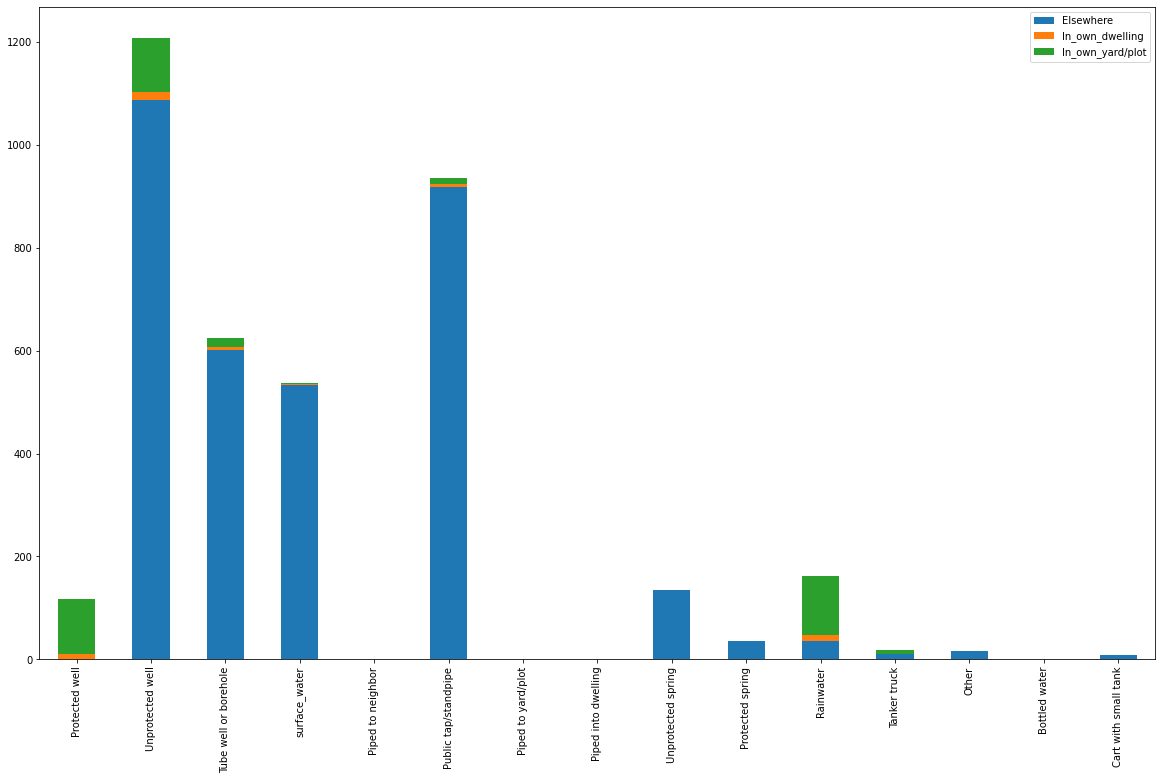

In [ ]:
index=list(df["HV201"].unique())
Elsewhere = [0,1086,601,534,0,917,0,0,135,35,36,11,17,0,9]
In_own_dwelling = [11,17,6,1,0,6,0,0,0,0,12,0,0,0,0]
In_own_yard_plot = [106,104,17,2,0,13,0,0,0,1,114,8,0,1,0]

dfp =pd.DataFrame({"Elsewhere": Elsewhere,
                  "In_own_dwelling": In_own_dwelling,
                  "In_own_yard/plot":In_own_yard_plot}, index=index)
ax = dfp.plot.bar(stacked = True)

In [ ]:
#!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandarallel: filename=pandarallel-1.6.1-py3-none-any.whl size=16265 sha256=30d7b2fafcc1162493a9fad90058d613301ca215fe0d303dfa94bcc3bac33593
  Stored in directory: /root/.cache/pip/wheels/e8/81/8f/29aafd7d671a4e9db4e976d71728870173f0b3f48ccba0bc32
Successfully built pandarallel


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


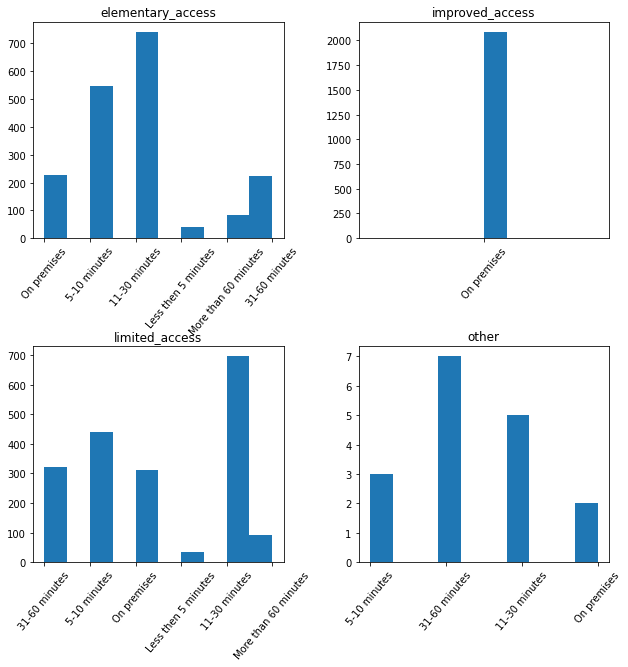

In [ ]:
# !pip install pandarallel
from pandarallel import pandarallel  # parallelization
pandarallel.initialize()

#function to transform values in column HV204 to groups
def transform_values_to_groups(value):
  if value == 0.0:
    return "On premises"
  if value < 5.0 and value > 0.0:
    return "Less then 5 minutes"
  if value >=5.0 and value <=10.0:
    return "5-10 minutes"
  if value >10.0 and value <=30.0:
    return "11-30 minutes"
  if value > 30.0 and value <=60.0:
    return "31-60 minutes"
  if value > 60.0:
    return "More than 60 minutes"


df2 = df.drop(["Index", "HHID", "Cluster_ID"], axis = 1)
df2 = df2.replace({"On premises": 0, "Don't know": -1})
df2 = df2.astype({'HV204': 'float64'})
df2["HV204"].unique()
df2["HV204_grouped"] = df2.parallel_apply(lambda row: transform_values_to_groups(row["HV204"]), axis=1)

# Verteilung der Mintuen die es braucht, um an Wasser zu kommen auf die neuen Labels
df_tmp = df2["HV204_grouped"].hist(xlabelsize = 10, xrot = 50, figsize = (10,10), by = df2["New_Label"])

In [ ]:
rslt = df2[df2["New_Label"] == "other"]
rslt["HV204_grouped"].value_counts()

31-60 minutes    7
11-30 minutes    5
5-10 minutes     3
On premises      2
Name: HV204_grouped, dtype: int64

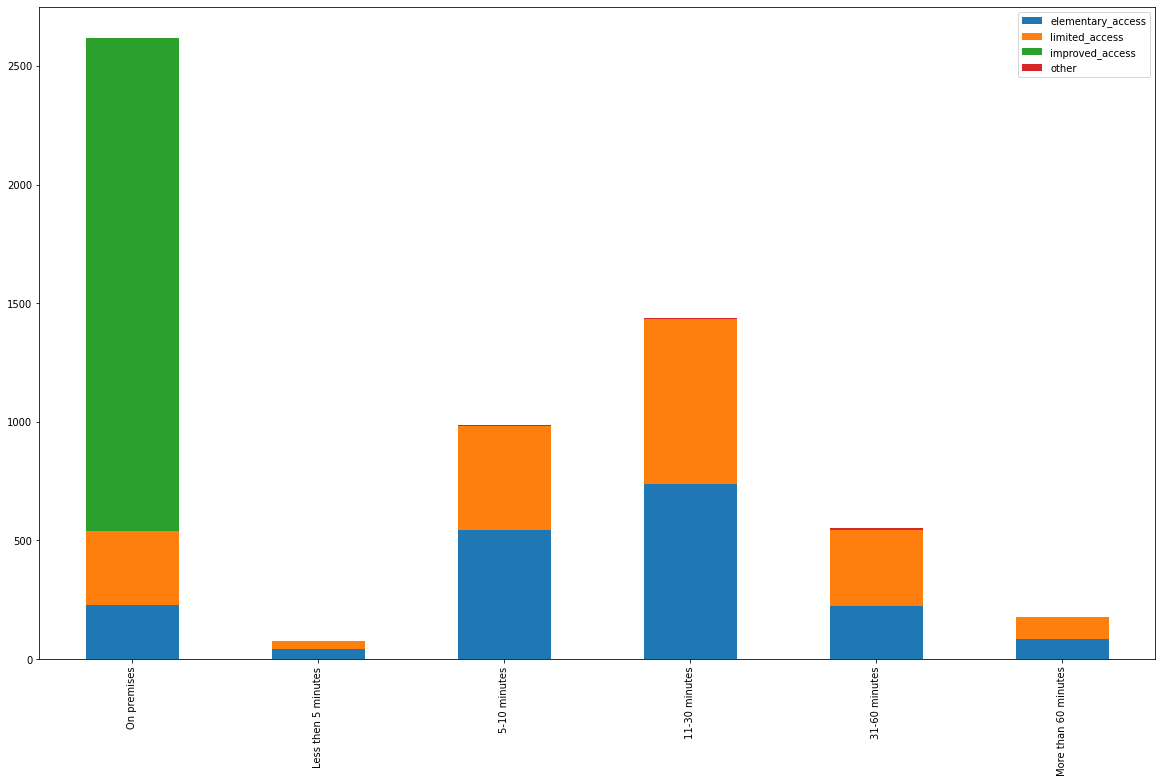

In [ ]:
index= ['On premises', 'Less then 5 minutes', '5-10 minutes', '11-30 minutes', '31-60 minutes', 'More than 60 minutes']

elementary_access = [228, 40, 545, 739, 223, 85]
limited_access = [310, 36, 439, 695, 322, 91]
improved_access = [2079, 0, 0, 0, 0, 0]
other = [2, 0, 3, 5, 7, 0]

dfp =pd.DataFrame({"elementary_access": elementary_access,
                  "limited_access": limited_access,
                  "improved_access": improved_access,
                  "other": other}, index=index)
ax = dfp.plot.bar(stacked = True)

In [ ]:
list(df2["HV204_grouped"].unique())
rslt = df2[df2["New_Label"] == "elementary_access"]
rslt["HV204_grouped"].value_counts()

11-30 minutes           739
5-10 minutes            545
On premises             228
31-60 minutes           223
More than 60 minutes     85
Less then 5 minutes      40
Name: HV204_grouped, dtype: int64

## **Fazit**

Aus den Visuellen Darstellung der Datenverteilung ergibt sich, dass die Distanz zur Wasserquelle möglicherweise besser geeignet ist, um die Daten sinnhaft aufzuteilen, als die Unterteilung nach dem Zugang zum Wasser. So gaben alle Haushalte die der Kategorie "improved_access" zugeordnet wurden an, Den Zugang "On premises", also direkt vor Ort zu haben. Die Haushalte der Kategorien "limited access" und "elementary access", brauchen am häufigsten jeweils 11-30 Minuten zur Wasserquelle. Bei der Wasserquelle stellt die Qualität des Wassers einen wichtigen Faktor dar. Jedoch ist die Interpretation mangels ausreichendem Hintergrund schwierig. Bei einer großen Distanz zu Wasserquelle kann man jedoch von einem ärmlichen Verhältnis ausgehen. Insbesondere wenn die Wasserquelle zudem auch noch als "limited" oder "elementary" kategorisiert wird. 

#Lessons learned


### Lessons learned - Melanie Ullrich:
Im Allgemeinen fand ich das Thema dieses Projekts sehr spannend und ich konnte viel über Machine Learning mit Satellitenbildern als Input lernen. Für mich waren die Themen zum Umgang mit Satellitenbildern und das Trainieren eines neuronalen Netzes in diesem Zusammenhang neu. Somit konnte ich thematisch sehr viel lernen. Bezüglich des Themas Clustering fand ich das Finden der Label nicht einfach. Hier hat eine Recherche über die Wasserbehandlung und die derzeitige Situation in Mozambik sehr geholfen. Nachdem das Thema und die Hintergründe dazu klar waren, konnten wir die drei Label definieren und die Zuordnungen der möglichen Antworten im Survey vornehmen. 

Zum technischen Teil des Clusterings habe ich beim Testen verschiedener Methoden mitgenommen, dass die klassifizierten Daten innerhalb der Label gleich verteilt sein müssen. Dies war bei der ersten Einteilung in den Klassen nicht gegeben. Somit haben wir Clustering-Methoden auf Daten angewandt, die im visualisierten Plot kein aussagekräftiges Ergebnis aufzeigen konnten bzw. nur die ungleiche Verteilung der Daten widerspiegelte. Somit lernte ich, dass eine Gewichtung oder eine neue Zuordnung für eine Gleichverteilung nötig war. Dies konnten wir mit der neuen Zuteilung zu den Labeln gewährleisten, wie die PCA-Analyse uns bestätigen konnte.

Im Weiteren habe ich aus diesem Projekt mitgenommen, dass man zuerst eine statistische Analyse über das Datenset machen sollte, bevor man neue Label für die Klasseneinteilung sucht. Die Aufstellung der Statistik konnte uns viel über die Daten aufzeigen und somit kamen wir im Endeffekt auch zu dem Schluss, dass es viel mehr Sinn ergibt die Distanz vom Haus bis zum nächsten Wasserzugang als Einteilung zu nutzen.

Beim Visualisieren innerhalb der Datenanalyse habe ich gelernt, dass es wichtig ist die Achsenbeschriftungen immer gleich anzuordnen, damit keine Missverständnisse beim Analysieren auftreten. 


### Lessons learned - Robin Hilbrecht:

Das Projekt war insgesamt sehr lehrreich. Das Arbeiten über eine Remoteverbindung war zwar im Allgemeinen nicht neu für mich, jedoch musste
ich feststellen, dass sich das Setup deutlich unterscheiden kann. Durch die Einarbeitung in die klare Struktur der Zielordner, konnte ich
viel über Datenmanagement lernen. Durch eine Vielzahl an kryptischen Fehlermeldungen war ich dazu gezwungen mich intensiv mit PyCharm auseinander 
zu setzen und mir so das Konzept und die Struktur dahinter genauer erschließen. Nach anfänglichen Schwierigkeiten bei
der PCA Analyse hat das Erschließen des theoretischen Hintergrunds sehr beim Verständnis geholfen. Anhand der 
Labelneufindung lernte ich, dass eine statistische Auswertung der Daten sinnvollerweise im Vorfeld geschehen sollte.
Im Umgang mit dem CNN, dass es eine Vielzahl an Stellschrauben gibt, welche sich gegenseitig beeinflussen und somit 
das Erstellen einer Testroutine sinnvoll ist. 


### Lessons learned - Tobias Jennert:

Nach dem Modul Big Data im 5.Semester, fand ich das Projekt sehr interessant, da ich hier den Einsatz von Neuronalen Netzen, speziell von einem CNN, praktisch nachvollziehen konnte. Speziell die aktive Arbeit an dem CNN im aktiven Projektkontext war für mich sehr lehrreich. Gerade sich mit der Remote-Maschine zu verbinden und damit mit zu arbeiten, war für mich eine völlig neue Erfahrung. Auch das nachvollziehen vom dem CNN und wie der Code aufgebaut war und funktionert hat, hat mir nochmal klar gemacht aus wie vielen Komponenten eine Neuronales Netzwerk besteht und an wie vielen Stellschrauben man drehen kann und das Netzwerk systematisch zu verbessern. 

Im weiterem Projektverlauf habe ich mich dann ebenfalls mit der PCA-Analyse beschäftigt. Diese wurde gebraucht, um die Verteilung und die Korrelation der alten Labels besser nach zu vollziehen und bessere Labels mit Hilfe von Clusteringmethoden zu finden. Dabei hatte ich am Anfang Schwierigkeiten die PCA-Analyse zu verstehen. Deshalb habe ich mich nochmal intensiver mit der Theorie hinter der Methode beschäftigt und das hat mir dann geholfen die Funktionsweise und den Anwendungsbereich der PCA-Analyse besser zu verstehen.

Also abschließend habe ich während des Projektes ein tieferes Verständnis für für das CNN bekommen und verstanden wofür und warum man eine PCA-Analyse anwendet und interpretiert.

### Lessons Learned - Kirill Gelgurt:

Ich fand das Projekt sehr spannend. Die Arbeit daran hat umso mehr Spaß gemacht durch die Tatsache, dass es ein reales Projekt ist, welches mit relevanten Daten durchgeführt wird. 

Hier wurde uns auch noch einmal deutlich gemacht, wie viel Arbeit mit der Beschaffung und vor allem der Auswahl der relevanten Daten verbunden ist. Man muss sich genau mit den Daten und der generellen Lage und Sitaution vertraut machen. In unserem Fall war es die Wassersituation in Mosambik. 

Die genaue Betrachtung der Umfrage zu der Wassersituation in den einzelnen Wohnorten hat mir einen direkten Einblick in die Lebenssituation in einem anderen Land gegeben, und die Bearbeitung des Projektes umso spannender gemacht. Vor allem hat es mir gezeigt, wie wichtig es ist, die Daten im Vorfeld genaustens zu betrachten und statistische Auswertungen zu machen, bevor man sich für Labels oder Analyseverfahren entscheidet, weil man sonst oft Dinge wiederholen und anpassen muss. In unserem Fall war das die Label-Neufindung.

Ich habe das Gefühl, dass ich einen sehr guten Einblick in die Durchführung von Projekten mit dem Einsatz von Neuronalen Netzen gekriegt habe. Die Arbeit an einer Remote-Machine über PyCharm fand ich auch sehr praktisch.

Die Arbeit mit einem bestehenden CNN, in welchem wir einzelne Stellschrauben bearbeiten, hat mir ebenfalls sehr gefallen. So konnte man sich auf einzelne Themen, wie in unserem Fall das Clustering und die PCA, konzentrieren und diese anhand eines praktischen Beispiels verstehen.